<a href="https://colab.research.google.com/github/balandongiv/rpbtool/blob/master/remove_vertical_horizontal_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

This notebook show the steps to clean the images and retain only text.

The steps is based on suggestion from [SO](https://stackoverflow.com/a/72364727/6446053).

Install require packages

Download and store the images under the folder `sample_image`

In [1]:
!gdown --folder https://drive.google.com/drive/folders/1BcjLMXj4G0gcuO-SjMEveCF1bGbqjeXb?usp=sharing -O sample_image --remaining-ok

Retrieving folder list
Processing file 1egF5ytVeKrTZ3ZHjXr6Ie-4YardvsOqY N0,DH,P6.jpg
Processing file 1Obw_9LGynPRRwBsSW1yQcWu12kMUmjoj N1,DG,DR.jpg
Processing file 1CKD5gJh-bYuocpgBddsMS5vdtoxMXo8k N3,BB,B5.jpg
Processing file 18Tsu7nSxT1jDDZl4Wrrtj8gGeib1tUJs NI,DG,BJ (1).jpg
Processing file 1ueDJXGEJ_l4TQyqSNWrN3Im9H4Xft6Nc NO,AG,EQ.jpg
Processing file 1rVr5VjD7NQyXzsZAXLmGKoUIdtDZN8OH NO,AG,GK.jpg
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1egF5ytVeKrTZ3ZHjXr6Ie-4YardvsOqY
To: /content/sample_image/N0,DH,P6.jpg
100% 2.05M/2.05M [00:00<00:00, 177MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Obw_9LGynPRRwBsSW1yQcWu12kMUmjoj
To: /content/sample_image/N1,DG,DR.jpg
100% 2.26M/2.26M [00:00<00:00, 167MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CKD5gJh-bYuocpgBddsMS5vdtoxMXo8k
To: /content/sample_image/N3,BB,B5.jpg
100% 2.22M/2.22M [00:00<00:00, 221MB/s]

Import packages

In [2]:
import os.path

import cv2
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
# import mne
# from tqdm import tqdm

Lets have helper function for ploting

In [3]:
def plot_multi_imgs(all_image,caption_tit=None):

    if caption_tit is None:
        caption_tits=[f'image_{idx}' for idx in range (len(all_image))]
    else:
        caption_tits=caption_tit


    if len(all_image)>3:
        nrow=2
        ncols=2
        figsize=(6,6)

    else:
        ncols=len(all_image)
        nrow=1
        figsize=(6,3)
    fig,ax=plt.subplots(nrow,ncols,figsize=figsize)
    for i,(a,dimg,title_) in enumerate(zip(ax.flatten(),all_image,caption_tits)):
        a.imshow(dimg, cmap='gray_r',);a.set_title(title_);a.set_xticks([]);a.set_yticks([])

    return fig

In [4]:
dpath='/content/sample_image/NI,DG,BJ (1).jpg'
im = cv2.imread(dpath)

Whiten non-ROI area

In [5]:
# Rough estimation the starting point of text region
y,x=50,700

# Rought estimation where the end of text region
y_end, x_end=1500,1350
white_bg = 255*np.ones_like(im)
white_bg[y:y+(y_end-y), x:x+(x_end-x)] =im[y:y+(y_end-y), x:x+(x_end-x)]
cv2.imwrite('test.png', white_bg)

True

In [6]:
gray=cv2.cvtColor(white_bg, cv2.COLOR_BGR2GRAY)

# print(gray.shape)

True

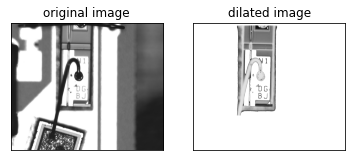

In [37]:
# remove_small_structure_elipse
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
dilate = cv2.dilate(gray, kernel, iterations = 2)
idx = (dilate==255)
gray[idx]=0
plot_multi_imgs([im,gray],caption_tit=['original image','dilated image']);


Remove vertical line

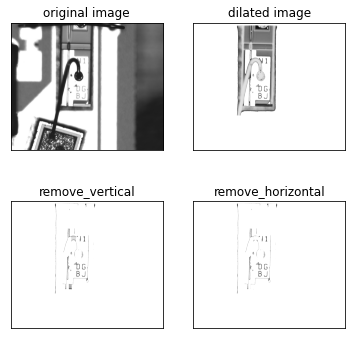

In [38]:

nimg_v=gray.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 40))
detLines = cv2.morphologyEx(nimg_v, cv2.MORPH_OPEN, kernel, iterations=2) #
nimg_v[(detLines !=0)]=0

# Remove horizontal lines
nimg_h=nimg_v.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,30)) 
detLines = cv2.morphologyEx(nimg_h, cv2.MORPH_OPEN, kernel, iterations=1) 
nimg_h[(detLines !=0)]=0

plot_multi_imgs([im,gray,nimg_v,nimg_h],caption_tit=['original image','dilated image','remove_vertical','remove_horizontal']);


Dilate the image

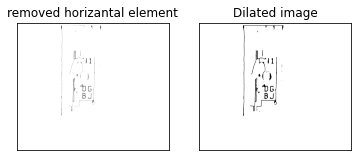

In [39]:
img_sm=nimg_h.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
dilate = cv2.dilate(img_sm, kernel, iterations = 4)
    
img_sm[(dilate !=0)]=255  
plot_multi_imgs([nimg_h,img_sm],caption_tit=['removed horizantal element','Dilated image']);

Remove small element

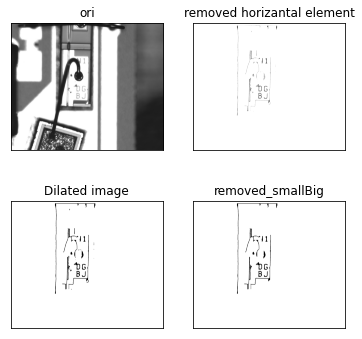

In [40]:
img_cont=img_sm.copy()
schunk_small=800
schunk_big=50000
cnts = cv2.findContours(img_cont, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
  area = cv2.contourArea(c)
  if (area < schunk_small) | (area>schunk_big):
    cv2.drawContours(img_cont, [c], -1, (0, 0, 0), -1)

plot_multi_imgs([im,nimg_h,img_sm,img_cont],caption_tit=['ori','removed horizantal element','Dilated image','removed_smallBig']);